# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 

In [7]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [8]:
BAC = data.DataReader('BAC', 'yahoo', '2006-01-01', '2016-01-01')
C=data.DataReader('C','yahoo', '2006-01-01', '2016-01-01')
GS=data.DataReader('GS','yahoo', '2006-01-01', '2016-01-01')
JPM=data.DataReader('JPM','yahoo', '2006-01-01', '2016-01-01')
MS=data.DataReader('MS','yahoo', '2006-01-01', '2016-01-01')
WFC=data.DataReader('WFC','yahoo', '2006-01-01', '2016-01-01')

In [9]:
#start=datetime.datetime(2006,1,1)
#end=datetime.datetime(2016,1,1)
#BAC=date.DataReader('BAC','yahoo',start,end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers=['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
#[BAC, C, GS, JPM, MS, WFC] are not passed a str bcz those are DataFrames
bank_stocks=pd.concat([BAC, C, GS, JPM, MS, WFC],keys=tickers,axis=1)
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942650   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582169   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625439   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574966   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596596   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.356142   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.231665   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.365038   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.160523   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.964903   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.114258  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.139038  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.238132  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.275291  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.659290  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.033369  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.765810  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.093786  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.817598  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.455095  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.444872  
2006-01-04  31.530001  10870000.0  20.207733  
2006-01-05  31.495001  10158000.0  20.185308  
2006-01-06  31.680000   8403800.0  20.303879  
2006-01-09  31.674999   5619600.0  20.300663  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  45.757145  
2015-12-28  54.680000   8288800.0  45.640293  
2015-12-29  55.290001   7894900.0  46.149456  
2015-12-30  54.889999   8016900.0  45.815571  
2015-12-31  54.360001  10929800.0  45.373196  

[2517 rows

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [13]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942650  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582169  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625439  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574966  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596596  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114258  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238132  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275291  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444872  
2006-01-04   31.799999  31.530001  10870000.0  20.207733  
2006-01-05   31.500000  31.495001  10158000.0  20.185308  
2006-01-06   31.580000  31.680000   8403800.0  20.303879  
2006-01-09   31.674999  31.674999   5619600.0  20.300663  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


** Max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [15]:
for tick in tickers:
   print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [16]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
for tick in tickers:
    returns [tick+' Return']=bank_stocks[tick]['Close'].pct_change()


In [18]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


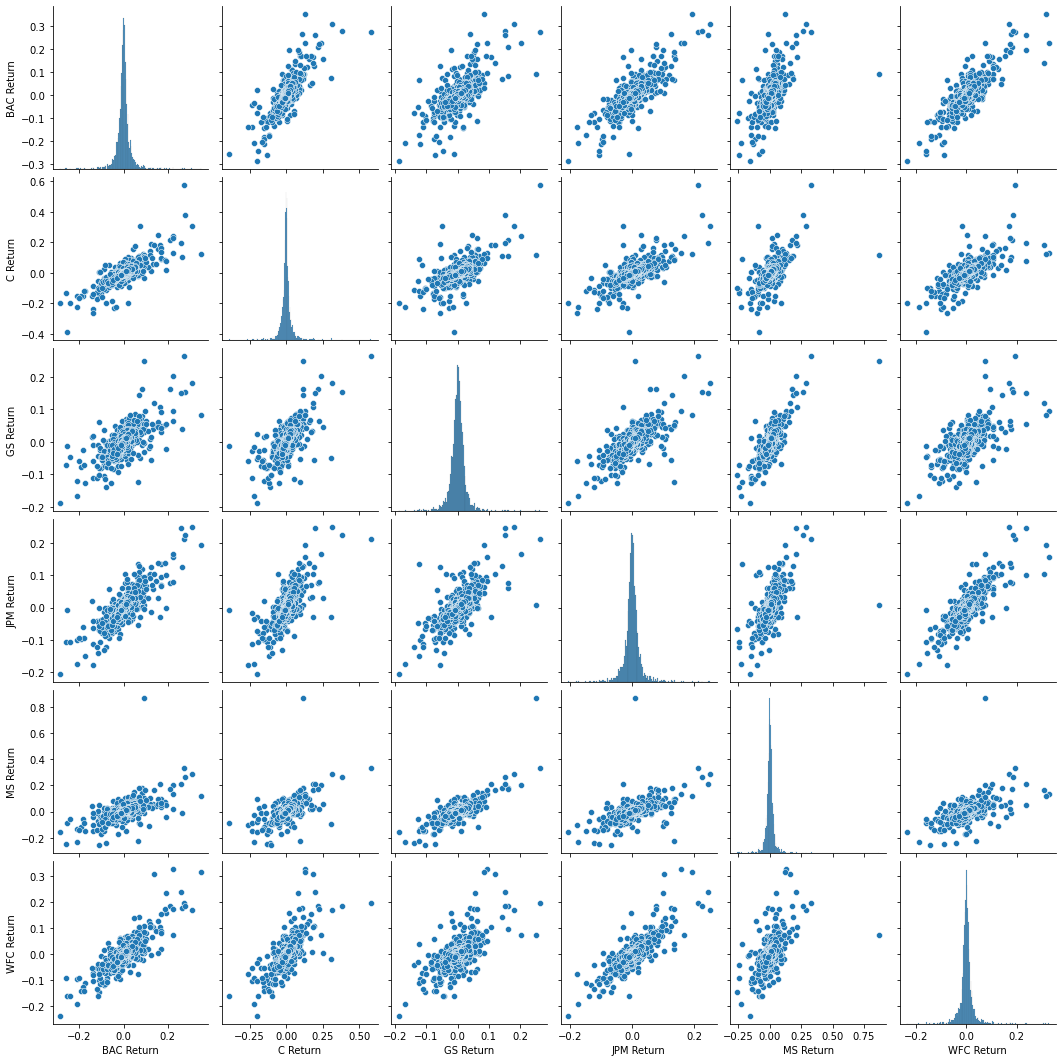

In [19]:
#indexing is done first row got NaN values
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [20]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [22]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [23]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [24]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [25]:
Morgan=returns['MS Return'].loc['2015-01-01':'2015-12-31']

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

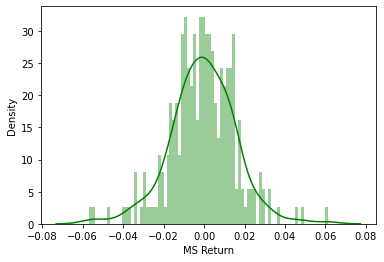

In [26]:
sns.distplot(Morgan,color='green',bins=80)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

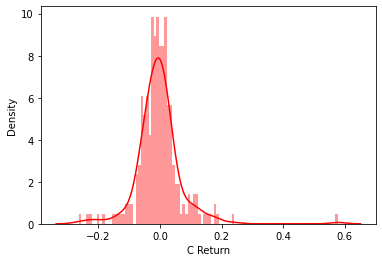

In [27]:
sns.distplot(returns['C Return'].loc['2008-01-01':'2008-12-31'],color='red',bins=100)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

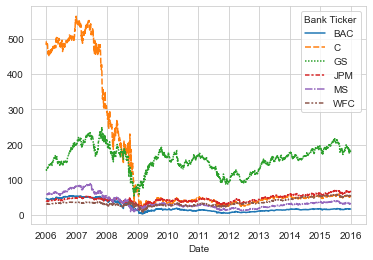

In [29]:
sns.lineplot(data=bank_stocks.xs('Close',level='Stock Info',axis=1))
sns.set(rc={'figure.figsize':(12,4)})

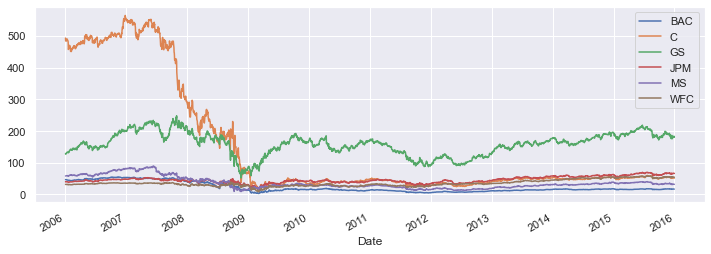

In [30]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
    
    

In [31]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [32]:
C

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,368.265564
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,361.466461
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,363.259705
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,363.259705
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,361.541290
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,45.675972
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,45.390018
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,45.909950


<AxesSubplot:xlabel='Date'>

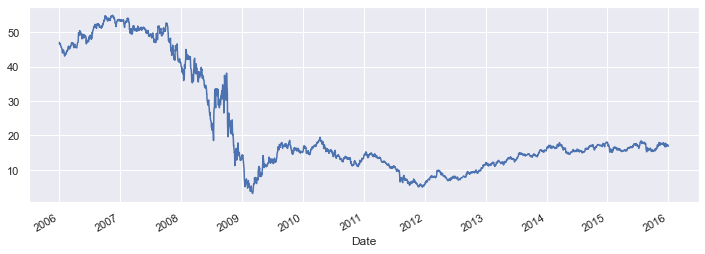

In [33]:
BAC['Close'].plot()

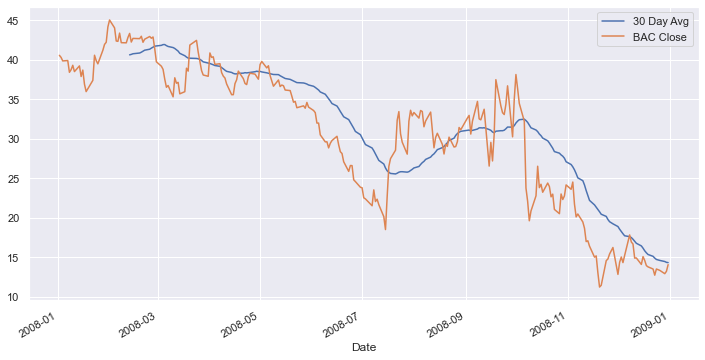

In [34]:
plt.figure(figsize=(12,6))
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01' : '2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks.xs(key='Close',axis=1,level='Stock Info')['BAC'].loc['2008-01-01' : '2009-01-01'].plot(label='BAC Close')
plt.legend()

In [35]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942650  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582169  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625439  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574966  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596596  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114258  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238132  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275291  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444872  
2006-01-04   31.799999  31.530001  10870000.0  20.207733  
2006-01-05   31.500000  31.495001  10158000.0  20.185308  
2006-01-06   31.580000  31.680000   8403800.0  20.303879  
2006-01-09   31.674999  31.674999   5619600.0  20.300663  

[5 rows x 36 columns]

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

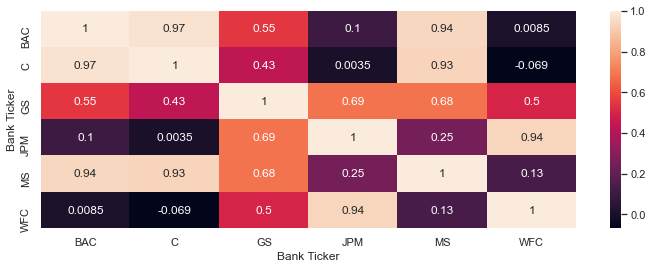

In [36]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)


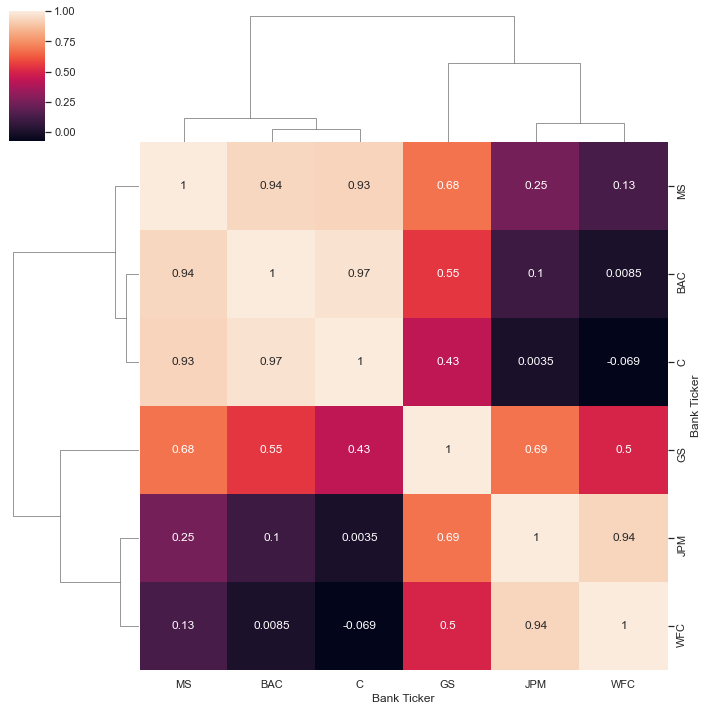

In [37]:
sns.clustermap(data=bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)

In [38]:
close_corr=bank_stocks.xs('Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [39]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [40]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [41]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages') 

In [42]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')